# Donut logistic 

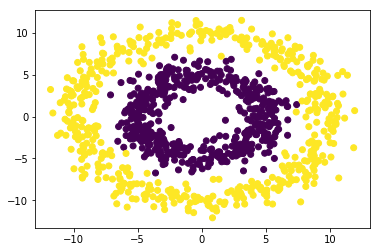

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
D = 2

R_inner = 5
R_outer = 10

# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)
R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([ X_inner, X_outer ])
T = np.array([0]*(N//2) + [1]*(N//2)) # labels: first 50 are 0, last 50 are 1

plt.scatter(X[:,0], X[:,1], c=T)
plt.show()



In [4]:
# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))

# add a column of r = sqrt(x^2 + y^2)
r = np.sqrt( (X * X).sum(axis=1) ).reshape(-1, 1)
Xb = np.concatenate((ones, r, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()




2106.89211855
223.52877731
144.848674904
111.61857675
93.1423686918
81.2932345995
73.0023077328
66.8507429614
62.0902126928
58.2876073588


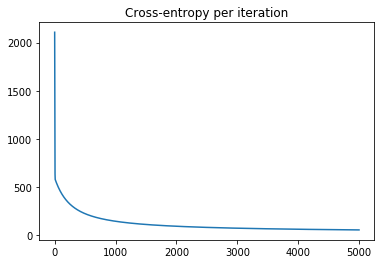

Final w: [ -1.16685489e+01   1.57603310e+00   1.90055530e-03  -9.75973277e-03]
Final classification rate: 0.992


In [5]:
# let's do gradient descent 100 times
learning_rate = 0.0001
error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 500 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    # w += learning_rate * ( np.dot((T - Y).T, Xb) - 0.01*w ) # old
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.1*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)